# **Laboratorio 11**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Paola Andrea Campiño Rincón
2.   Nombre integrante 2

**Número del grupo**

*5*

En las últimas clases hemos visto las aplicaciones de la regresión en el modelamiento y filtrado de datos. Para obtener los coeficientes de la regresión partimos de un problema de optimización de mínimos cuadrados con la siguiente forma:

\begin{align*}
  \min_\beta ||y-H\beta||_2^2
 \end{align*}

Al ser resuelto analíticamente obtenemos los los valores de $\beta$ que minimizan el problema a través de la fórmula:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
\end{align*}

Existen algunos escenarios en los que utilizar la norma L2 al cuadrado para definir el problema inicial de optimización no es ventajoso. En el presente laboratorio vamos a explorar dichos escenarios. Una forma distinta de plantear el problema inicial es utilizar la norma L1 del error. Consideremos siguiente problema:

\begin{align*}
  \min_\beta ||y-H\beta||_1
 \end{align*}

Este problema también buscar reducir el error entre $y$ y $H\beta$. Sin embargo, a diferencia de la optimización basada en mínimos cuadrados, este último método no puede ser resuelto de manera analítica, por lo que debemos utilizar las librerías de optimización de Python.



1. Importe los datos del archivo *reg_1.mat*, los datos son importados como un diccionario, el primer elemento de la clave "x" corresponde al eje x y el primer elemento de la clave "y" al eje y.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

df = loadmat("Reg1.mat")

x=np.array(df["x"] )[0]
y=np.array(df["y"] )[0]


2. Obtenga los coeficientes de la regresión lineal utilizando el algoritmo de mínimos cuadrados, utilice un polinomio de orden 3.

In [ ]:
def print_coeficientes(coef):
    for i in range(0,len(coef)):
      print("\u03B2_"+str(i)+":"+str(coef[i]))
def matriz_h(n,arr):
    s=(len(arr),n+1)
    matriz_result=np.ones(s)
    for i in range(0,len(arr)):
      for j in range (0,n+1):
        matriz_result[i][j]=arr[i]**j
    return matriz_result
def beta_c(h, y):
    ht_h=np.dot(h.transpose(),h)
    ht_transpose = np.linalg.inv(ht_h)
    htransp_ht = np.dot(ht_transpose,h.transpose())
    beta_c = np.dot(htransp_ht,y)
    return beta_c

h = matriz_h(3,x)

coeficientes = beta_c(h, y)

print_coeficientes(coeficientes)

β_0:-3.3247383930662577
β_1:9.433534046388061
β_2:-4.835215341775527
β_3:0.8325559371760265


3. Ahora utilice la norma L1 para encontrar los coeficientes de la regresión. Utilice la función *minimize* de la librería *scipy.optimize*



In [ ]:
from scipy.optimize import minimize

def funcionObjetivo(B):
  y_aprox = np.dot(h,B)
  error = y-y_aprox
  resultado = 0
  for x in error:
    resultado += abs(x)

  return resultado


initial_guess=[0,0,0,0]
resultado = minimize(funcionObjetivo, initial_guess)

4. Grafique la regresión obtenida junto con los datos.

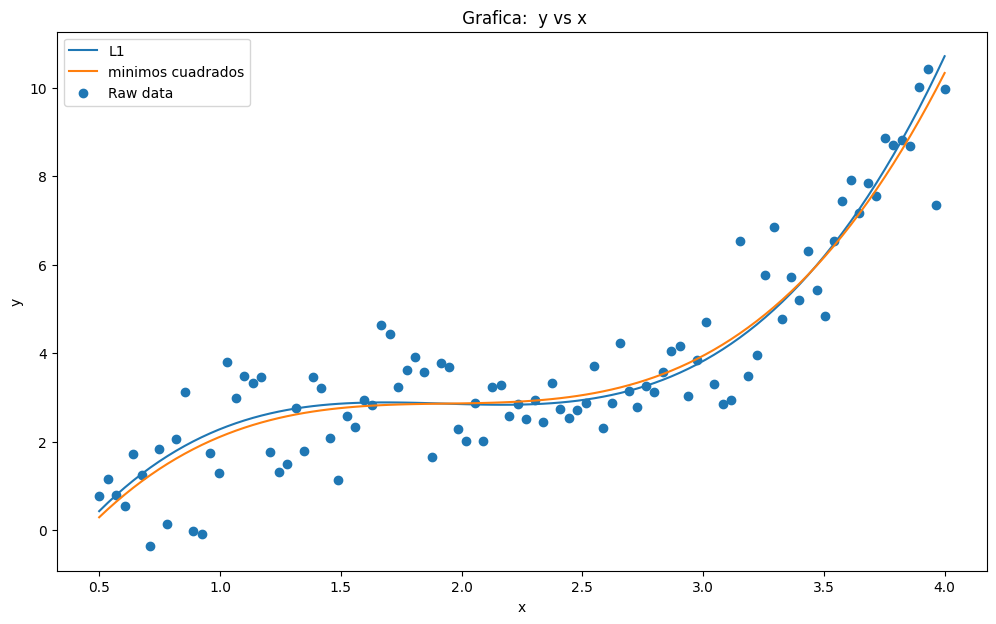

In [ ]:
figure_1 = plt.figure(figsize=(12, 7))
ax_1 = figure_1.add_subplot(1,1,1)

y_l1 = np.dot(h,resultado.x)
ax_1.plot(x,y_l1, label='L1')

y_l2 = np.dot(h,coeficientes)
ax_1.plot(x,y_l2, label='L2')


ax_1.scatter(x,y, label='Raw data')

ax_1.set_xlabel('x')
ax_1.set_ylabel('y')
ax_1.set_title(" Grafica:  y vs x")

ax_1.legend(loc = 'upper left')

5. Realice el mismo procedimiento de los puntos 1-4 con los datos del archivo _reg_2.mat_.

In [ ]:
df = loadmat("Reg2.mat")

x_2=np.array(df["x"] )[0]
y_2=np.array(df["y"] )[0]


h = matriz_h(3,x_2)

coeficientes = beta_c(h, y_2)

print_coeficientes(coeficientes)
resultado2 = minimize(funcionObjetivo, initial_guess)

β_0:-4.828976282907622
β_1:9.537341823532397
β_2:-3.2508743513393186
β_3:0.4282922474042111


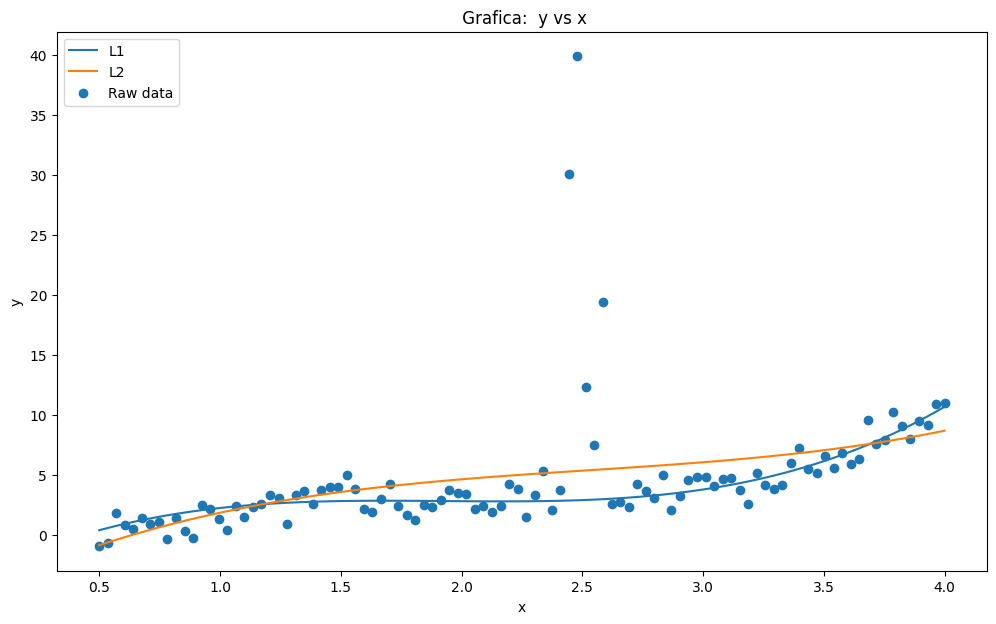

In [ ]:
figure_2 = plt.figure(figsize=(12, 7))
ax_1 = figure_2.add_subplot(1,1,1)

y_l1 = np.dot(h,resultado2.x)
ax_1.plot(x_2,y_l1, label='L1')

y_l2 = np.dot(h,coeficientes)
ax_1.plot(x_2,y_l2, label='L2')


ax_1.scatter(x_2,y_2, label='Raw data')

ax_1.set_xlabel('x')
ax_1.set_ylabel('y')
ax_1.set_title(" Grafica:  y vs x")

ax_1.legend(loc = 'upper left')

6. Compare el método basado en la norma L1 vs. la norma L2. ¿Qué ocurre con las regresiones cuando hay *outliers*$^1$ o anomalías? Refiérase al efecto de penalización que ocurre en cada caso.



 En terminos generales se puede ver que L2 se ve mucho más influenciado por los outliers contrario a lo que pasaría en L1. Esto puede ser especialmente problematico para L2 ya que hay una buena parte de los datos que no se acomodan a la grafica, en pocas palabras la penalización por outliers puede ser mayor cuando se basa en la norma L2. Contrario a lo que pasa con L1 que si bien hay outliers este no se ve tan influenciados por dichos valores.